In [1]:
import pandas as pd

In [2]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms, datasets





<font size = '+2'> Unpack tar file

In [3]:
import tarfile
mytar = tarfile.open('C:\\Users\\cgwel\\2526\\102flowers.tgz')
mytar.extractall('C:\\Users\\cgwel\\2526')
mytar.close()

Only need to unpack tar data once hence commented out
<br> 102flowers.tgz contains jpg files of flowers
<br> 102segmentations.tgz contains segments jpg files of flowers

<font size = '+2'> Handle .mat files

In [4]:
import os
import scipy.io as sio

label_mat_file = sio.loadmat(r'C:\Users\cgwel\2526\imagelabels.mat')
distance_mat_file = sio.loadmat(r'C:\Users\cgwel\2526\distancematrices102.mat')
setid_mat_file = sio.loadmat(r'C:\Users\cgwel\2526\setid.mat')

In [5]:
label_mat_file.keys()

dict_keys(['__header__', '__version__', '__globals__', 'labels'])

In [6]:
type(label_mat_file['labels']),label_mat_file['labels'].shape

(numpy.ndarray, (1, 8189))

In [7]:
type(label_mat_file['labels'][0][0]),label_mat_file['labels'][0][0].shape

(numpy.uint8, ())

In [8]:
setid_mat_file.keys()

print(setid_mat_file)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Thu Feb 19 17:38:58 2009', '__version__': '1.0', '__globals__': [], 'trnid': array([[6765, 6755, 6768, ..., 8026, 8036, 8041]], dtype=uint16), 'valid': array([[6773, 6767, 6739, ..., 8028, 8008, 8030]], dtype=uint16), 'tstid': array([[6734, 6735, 6737, ..., 8044, 8045, 8047]], dtype=uint16)}


numpy does not know the shape of the uint8 array

In [9]:
#access the members of the structs using keys

print(label_mat_file)

#parse .mat file structure
label_list = [[element  for element in upperElement] for upperElement in label_mat_file['labels'] ]
#send to a pandas dataframe
new_data = list(label_list[0])
columns = ['label']

label_df = pd.DataFrame(new_data, columns = columns)
label_df.to_csv('labels.csv',index = False)
#print(label_list)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Thu Feb 19 15:43:33 2009', '__version__': '1.0', '__globals__': [], 'labels': array([[77, 77, 77, ..., 62, 62, 62]], dtype=uint8)}


In [10]:
label_list[0][250]

77

In [11]:
unique_vals = label_df['label'].value_counts()
unique_vals.shape

(102,)

After getting each unique value and their counts from label_df we can see we have 102 classes of flowers

Lets see how many files are in the jpg folder

In [12]:


folder_path = r'C:\Users\cgwel\2526\jpg'

file_count = len([name for name in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, name))])

print(f"The folder '{folder_path}' contains {file_count} files.")


The folder 'C:\Users\cgwel\2526\jpg' contains 8189 files.


In [13]:
label_df.shape

(8189, 1)

In [14]:
label_df

,label
0,77
1,77
2,77
3,77
4,77
...,...
8184,62
8185,62
8186,62
8187,62


The number of labels match the number of files in jpg (8189 == 8189). Assuming the jpg files are in order we are going to add the label to the end of the jpg file name and bin all the same labels into seperate folders


<font size = '+2'> Label images

In [15]:
import os
import pandas as pd

# Path to the folder containing the images
image_folder = r'C:\Users\cgwel\2526\jpg'

# Load the label DataFrame
# Replace "path/to/label_df.csv" with the actual path to your label DataFrame
label_df = pd.read_csv(r"C:\Users\cgwel\2526\labels.csv")

# Check if labeling has already been done by examining the file names
already_labeled = all(filename.split("_")[0].isdigit() for filename in os.listdir(image_folder))

if already_labeled:
    print('Labeling has already been done. Skipping the process.')
else:
    # Iterate over the image files in the folder
    for filename in os.listdir(image_folder):
        if filename.endswith(".jpg"):
            image_path = os.path.join(image_folder, filename)
            image_index = int(filename.split("_")[1].split(".")[0])

            # Get the label for the current image index from the DataFrame
            label = label_df.loc[image_index - 1, "label"]

            # Rename the image file with the label
            new_filename = f"{label}_{filename}"
            new_image_path = os.path.join(image_folder, new_filename)

            # Rename the image file
            os.rename(image_path, new_image_path)

            # Optional: Update the DataFrame with the new filename if needed
            label_df.loc[image_index - 1, "Filename"] = new_filename

    # Optional: Save the updated DataFrame to a new file if needed
    label_df.to_csv("updated_label_df.csv", index=False)

    print('Labeling completed successfully.')


Labeling completed successfully.


count images amount per class

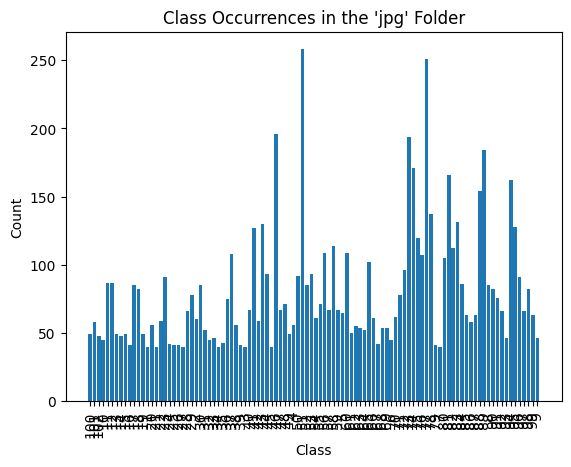

Class '100' occurs 49 times.
Class '101' occurs 58 times.
Class '102' occurs 48 times.
Class '10' occurs 45 times.
Class '11' occurs 87 times.
Class '12' occurs 87 times.
Class '13' occurs 49 times.
Class '14' occurs 48 times.
Class '15' occurs 49 times.
Class '16' occurs 41 times.
Class '17' occurs 85 times.
Class '18' occurs 82 times.
Class '19' occurs 49 times.
Class '1' occurs 40 times.
Class '20' occurs 56 times.
Class '21' occurs 40 times.
Class '22' occurs 59 times.
Class '23' occurs 91 times.
Class '24' occurs 42 times.
Class '25' occurs 41 times.
Class '26' occurs 41 times.
Class '27' occurs 40 times.
Class '28' occurs 66 times.
Class '29' occurs 78 times.
Class '2' occurs 60 times.
Class '30' occurs 85 times.
Class '31' occurs 52 times.
Class '32' occurs 45 times.
Class '33' occurs 46 times.
Class '34' occurs 40 times.
Class '35' occurs 43 times.
Class '36' occurs 75 times.
Class '37' occurs 108 times.
Class '38' occurs 56 times.
Class '39' occurs 41 times.
Class '3' occurs 4

In [16]:
import os
from collections import Counter
import matplotlib.pyplot as plt

# Path to the folder containing the images
image_folder = r'C:\Users\cgwel\2526\jpg'

# Initialize a counter to keep track of the class occurrences
class_counter = Counter()

# Iterate over the image files in the folder
for filename in os.listdir(image_folder):
    if filename.endswith(".jpg"):
        label = filename.split("_")[0]
        class_counter[label] += 1

# Get the class labels and their corresponding counts
labels = list(class_counter.keys())
counts = list(class_counter.values())

# Plot the class occurrences
plt.bar(labels, counts)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Occurrences in the 'jpg' Folder")
plt.xticks(rotation=90)
plt.show()

for label, count in class_counter.items():
    print(f"Class '{label}' occurs {count} times.")


<font size = '+2'> Create train and validation folders 80 20 split

In [17]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Path to the folder containing the images
image_folder = r'C:\Users\cgwel\2526\jpg'

# Destination folder for train and val sets
destination_folder = r'C:\Users\cgwel\2526\flowers'

# Check if the destination folder already exists
if not os.path.exists(destination_folder):
    # Create the destination folder if it doesn't exist
    os.makedirs(destination_folder, exist_ok=True)

    # Get the list of image files in the image folder
    image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg')]

    # Split the image files into train and val sets
    train_files, val_files = train_test_split(image_files, test_size=0.2, random_state=42)

    # Function to extract class label from image file name
    def get_class_label(file_name):
        class_label = int(file_name.split('_')[0])
        return class_label

    # Move the train files to the train folder
    for train_file in train_files:
        train_src = os.path.join(image_folder, train_file)
        train_class = get_class_label(train_file)
        train_folder = os.path.join(destination_folder, 'train', str(train_class))
        os.makedirs(train_folder, exist_ok=True)
        train_dst = os.path.join(train_folder, train_file)
        shutil.move(train_src, train_dst)

    # Move the val files to the val folder
    for val_file in val_files:
        val_src = os.path.join(image_folder, val_file)
        val_class = get_class_label(val_file)
        val_folder = os.path.join(destination_folder, 'val', str(val_class))
        os.makedirs(val_folder, exist_ok=True)
        val_dst = os.path.join(val_folder, val_file)
        shutil.move(val_src, val_dst)

    print('Files moved successfully.')
else:
    print('Destination folder already exists. Skipping the process.')


Destination folder already exists. Skipping the process.


Create a test folder for testing later from transformed (back to normal) val images 

In [18]:
import os
import shutil

# Source folder containing the images
source_folder = r'C:\Users\cgwel\2526\flowers\val'

# Destination folder to save the copied images
destination_folder = r'C:\Users\cgwel\2526\test'

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Check if the destination folder already exists
if not os.path.exists(destination_folder):
    # Copy each subfolder and its contents to the destination folder
    for folder_name in os.listdir(source_folder):
        source_path = os.path.join(source_folder, folder_name)
        destination_path = os.path.join(destination_folder, folder_name)
        shutil.copytree(source_path, destination_path)

    print('Folders and their contents copied successfully to the "test" folder.')
else:
    print('Destination folder already exists. Skipping the copying process.')


Destination folder already exists. Skipping the copying process.


In [19]:
import os

# Path to the parent folder containing the train and val folders
parent_folder = r'C:\Users\cgwel\2526\classes'

# Iterate over the class folders
for class_folder in os.listdir(parent_folder):
    class_folder_path = os.path.join(parent_folder, class_folder)
    if os.path.isdir(class_folder_path):
        train_folder_path = os.path.join(class_folder_path, 'train')
        val_folder_path = os.path.join(class_folder_path, 'val')

        # Count the number of images in the train folder
        train_count = len(os.listdir(train_folder_path))

        # Count the number of images in the val folder
        val_count = len(os.listdir(val_folder_path))

        # Print the class label and the counts
        print(f"Class: {class_folder}")
        print(f"Train Count: {train_count}")
        print(f"Val Count: {val_count}")
        print("---------------")


Class: 1
Train Count: 33
Val Count: 7
---------------
Class: 10
Train Count: 32
Val Count: 13
---------------
Class: 100
Train Count: 40
Val Count: 9
---------------
Class: 101
Train Count: 37
Val Count: 21
---------------
Class: 102
Train Count: 44
Val Count: 4
---------------
Class: 11
Train Count: 73
Val Count: 14
---------------
Class: 12
Train Count: 70
Val Count: 17
---------------
Class: 13
Train Count: 42
Val Count: 7
---------------
Class: 14
Train Count: 36
Val Count: 12
---------------
Class: 15
Train Count: 35
Val Count: 14
---------------
Class: 16
Train Count: 27
Val Count: 14
---------------
Class: 17
Train Count: 70
Val Count: 15
---------------
Class: 18
Train Count: 67
Val Count: 15
---------------
Class: 19
Train Count: 33
Val Count: 16
---------------
Class: 2
Train Count: 41
Val Count: 19
---------------
Class: 20
Train Count: 46
Val Count: 10
---------------
Class: 21
Train Count: 35
Val Count: 5
---------------
Class: 22
Train Count: 51
Val Count: 8
-------------

Using these values we can double check that each class has the right amount of images

Let check if the amount of folders in classes is equal to the amount of classes found previously as unique_vals

In [20]:


folder_path = r'C:\Users\cgwel\2526\classes'  # Specify the path to the folder

# Get the list of items (files and folders) within the folder
items = os.listdir(folder_path)

# Count the number of folders
num_folders = sum(os.path.isdir(os.path.join(folder_path, item)) for item in items)

print(f"The folder '{folder_path}' contains {num_folders} folders.")


The folder 'C:\Users\cgwel\2526\classes' contains 102 folders.


102 folders == 102 uniqe values seems like the classes are sperated correctly

In [21]:
import os

# Path to the folder
data_folder = r'C:\Users\cgwel\2526\classes'

# Initialize a set to store the unique file formats
file_formats = set()

# Recursive function to traverse the folder and its subfolders
def traverse_folder(folder):
    for root, dirs, files in os.walk(folder):
        for file in files:
            _, extension = os.path.splitext(file)
            file_formats.add(extension[1:])  # Exclude the dot from the extension

# Traverse the folder and its subfolders
traverse_folder(data_folder)

# Print the file formats
print("File Formats:")
for format in file_formats:
    print(format)


File Formats:
jpg


All of the images are of jpg format

Anomalies:
Image 151 - Height: 807, Width: 500
Image 156 - Height: 781, Width: 500
Image 221 - Height: 812, Width: 500
Image 228 - Height: 833, Width: 500
Image 256 - Height: 1137, Width: 500
Image 258 - Height: 794, Width: 500
Image 263 - Height: 787, Width: 500
Image 267 - Height: 845, Width: 500
Image 303 - Height: 803, Width: 500
Image 311 - Height: 763, Width: 500
Image 321 - Height: 828, Width: 500
Image 434 - Height: 782, Width: 500
Image 462 - Height: 766, Width: 500
Image 488 - Height: 822, Width: 500
Image 513 - Height: 766, Width: 500
Image 580 - Height: 769, Width: 500
Image 594 - Height: 774, Width: 500
Image 655 - Height: 500, Width: 1024
Image 854 - Height: 766, Width: 500
Image 861 - Height: 791, Width: 500
Image 898 - Height: 778, Width: 500
Image 899 - Height: 781, Width: 500
Image 960 - Height: 861, Width: 500
Image 1042 - Height: 792, Width: 500
Image 1052 - Height: 764, Width: 500
Image 1055 - Height: 764, Width: 500
Image 1085 - Height: 762, Width: 500
Image 1100 

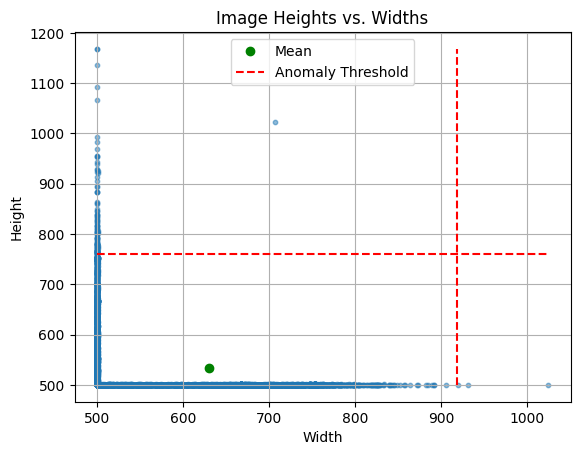

In [22]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Path to the folder containing the images
folder_path 

# Initialize empty lists to store image heights and widths
heights = []
widths = []

# Iterate over the images in the folder using os.walk
for root, _, files in os.walk(folder_path):
    for image_file in files:
        image_path = os.path.join(root, image_file)

        # Load the image
        image = Image.open(image_path)

        # Get the height and width of the image
        width, height = image.size

        # Append the height and width to the respective lists
        heights.append(height)
        widths.append(width)

# Calculate the mean and standard deviation
mean_height = np.mean(heights)
std_height = np.std(heights)
mean_width = np.mean(widths)
std_width = np.std(widths)

# Set the threshold for anomaly detection (e.g., 3 standard deviations from the mean)
threshold_height = mean_height + 3 * std_height
threshold_width = mean_width + 3 * std_width

# Create a list to store the indices of anomalies
anomaly_indices = []

# Iterate over the heights and widths to identify anomalies
for i in range(len(heights)):
    if heights[i] > threshold_height or widths[i] > threshold_width:
        anomaly_indices.append(i)

# Print the list of anomalies
print("Anomalies:")
for i in anomaly_indices:
    print(f"Image {i+1} - Height: {heights[i]}, Width: {widths[i]}")

# Create the scatter plot
plt.scatter(widths, heights, s=10, alpha=0.5)
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Image Heights vs. Widths')
plt.grid(True)

# Add points and dotted lines for min, max, and mean values
plt.plot([mean_width], [mean_height], 'go', label='Mean')
plt.plot([threshold_width, threshold_width], [np.min(heights), np.max(heights)], 'r--', label='Anomaly Threshold')
plt.plot([np.min(widths), np.max(widths)], [threshold_height, threshold_height], 'r--')
plt.legend()

plt.show()



Most of the images are of size 500xwidth or heightx500 and one image that is around 1022x707 
<br> Anomalies are points that have heights or widths beyond 3 standard-deviations from the mean

<font size = '+2'> Train model 

In [23]:

import matplotlib.pyplot as plt 

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms, models
import time
import numpy as np
from PIL import Image
import json
from collections import OrderedDict
import os

In [24]:


# TODO: Define your transforms for the training, validation, and testing sets
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                         transforms.RandomResizedCrop(224),
                                         transforms.RandomHorizontalFlip(p = 0.6),
                                         transforms.RandomVerticalFlip(p = 0.4),
                                         transforms.ToTensor(),
                                         transforms.Normalize([0.485, 0.456, 0.406],
                                                              [0.229, 0.224, 0.225])])
test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])
valid_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

train_dir = r'C:\Users\cgwel\2526\flowers\train'
val_dir = r'C:\Users\cgwel\2526\flowers\val'
test_dir = r'C:\Users\cgwel\2526\test'
# TODO: Load the datasets with ImageFolder
train_data = datasets.ImageFolder(train_dir, transform=train_transforms)
test_data = datasets.ImageFolder(test_dir, transform=test_transforms)
val_data = datasets.ImageFolder(val_dir, transform=valid_transforms)

# TODO: Using the image datasets and the trainforms, define the dataloaders
trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=64)
validloader = torch.utils.data.DataLoader(val_data, batch_size=64)



In [25]:
# TODO: Build and train your network
num_classes = 102
weights = models.ResNet50_Weights
# setup to pick up GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# get pre-trained model
model = models.resnet50(weights = weights)
#print(model)

# freeze parameters - to prevent gradients and backprop
for param in model.parameters():
    param.requires_grad = False

classifier = nn.Sequential(nn.Linear(2048, 500),
                           nn.ReLU(),
                           nn.Dropout(p=0.2),
                           nn.Linear(500, num_classes),
                           nn.LogSoftmax(dim=1)
                          )
model.fc = classifier

# Initialization
criterion = nn.NLLLoss()

optimizer = optim.Adam(model.fc.parameters(), lr=0.003)

# move model to cuda if available
model.to(device)

c:\Users\cgwel\2526\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [26]:


traintime = time.time()

epochs = 30
training_loss = 0

train_losses, valid_losses = [], []

for epoch in range(epochs):
    model.train()
    for images, labels in trainloader:
        
        # move the variables to GPU
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()        
        
        logps = model(images)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()
        
        training_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0

        # turn of dropouts
        model.eval()

        with torch.no_grad():                

            for images, labels in validloader:

                # move the variables to GPU
                images, labels = images.to(device), labels.to(device)
                
                start = time.time()

                logps = model(images)
                loss = criterion(logps, labels)
                test_loss += loss.item()

                # Calculate accuracy
                ps = torch.exp(logps)
                top_prob, top_class = ps.topk(1, dim=1)
                targets = labels.view(*top_class.shape)
                isEqual = top_class == targets                                                  
                accuracy += torch.mean(isEqual.type(torch.FloatTensor))
            
            train_losses.append(training_loss/len(trainloader))
            valid_losses.append(test_loss/len(validloader))
            
            print(f"Epoch {epoch+1}/{epochs}.. "
                  f"Train loss: {training_loss/len(trainloader):.3f}.. "
                  f"validation loss: {test_loss/len(validloader):.3f}.. "
                  f"Validation accuracy: {accuracy/len(validloader):.3f}")
            print(f"Device = {device}; Time per batch: {(time.time() - start)/len(validloader):.3f} seconds")
            
            training_loss = 0
            
            # switch back to training
            model.train()
            
print(f" \nTotal Time : {(time.time() - traintime)/60:.3f} minutes")



Epoch 1/30.. Train loss: 3.420.. validation loss: 1.684.. Validation accuracy: 0.568
Device = cuda:0; Time per batch: 0.011 seconds
Epoch 2/30.. Train loss: 1.880.. validation loss: 1.057.. Validation accuracy: 0.704
Device = cuda:0; Time per batch: 0.011 seconds
Epoch 3/30.. Train loss: 1.490.. validation loss: 0.836.. Validation accuracy: 0.756
Device = cuda:0; Time per batch: 0.011 seconds
Epoch 4/30.. Train loss: 1.344.. validation loss: 0.720.. Validation accuracy: 0.788
Device = cuda:0; Time per batch: 0.011 seconds
Epoch 5/30.. Train loss: 1.281.. validation loss: 0.559.. Validation accuracy: 0.846
Device = cuda:0; Time per batch: 0.011 seconds
Epoch 6/30.. Train loss: 1.187.. validation loss: 0.604.. Validation accuracy: 0.830
Device = cuda:0; Time per batch: 0.011 seconds
Epoch 7/30.. Train loss: 1.186.. validation loss: 0.561.. Validation accuracy: 0.836
Device = cuda:0; Time per batch: 0.012 seconds
Epoch 8/30.. Train loss: 1.174.. validation loss: 0.516.. Validation accurac

In [27]:
checkpoint = {'pretrained_model_name' : "resnet50",
              'input_size' : 2048,
              'output_size' : 102,
              'hidden_layer' : 500,
              'model_state_dict': model.state_dict(),
              'optim_state_dict' : optimizer.state_dict(),
              'class_to_idx': train_data.class_to_idx,
              'train_losses': train_losses,
              'valid_losses' : valid_losses}

torch.save(checkpoint, 'trained_model_chpt.pth')

model.to("cpu")
checkpoint = {'pretrained_model_name' : "resnet50",
              'input_size' : 2048,
              'output_size' : 102,
              'hidden_layer' : 500,
              'model_state_dict': model.state_dict(),
              'optim_state_dict' : optimizer.state_dict(),
              'class_to_idx': train_data.class_to_idx,
              'train_losses': train_losses,
              'valid_losses' : valid_losses}

torch.save(checkpoint, 'trained_model_cpu_chpt.pth')
model.to("cuda")

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

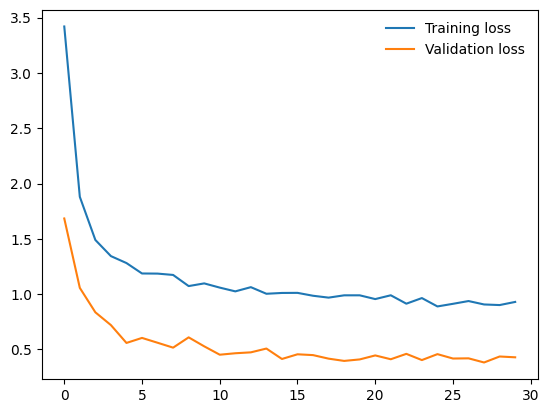

In [28]:
plt.plot(train_losses, label='Training loss')
plt.plot(valid_losses, label='Validation loss')
plt.legend(frameon=False)

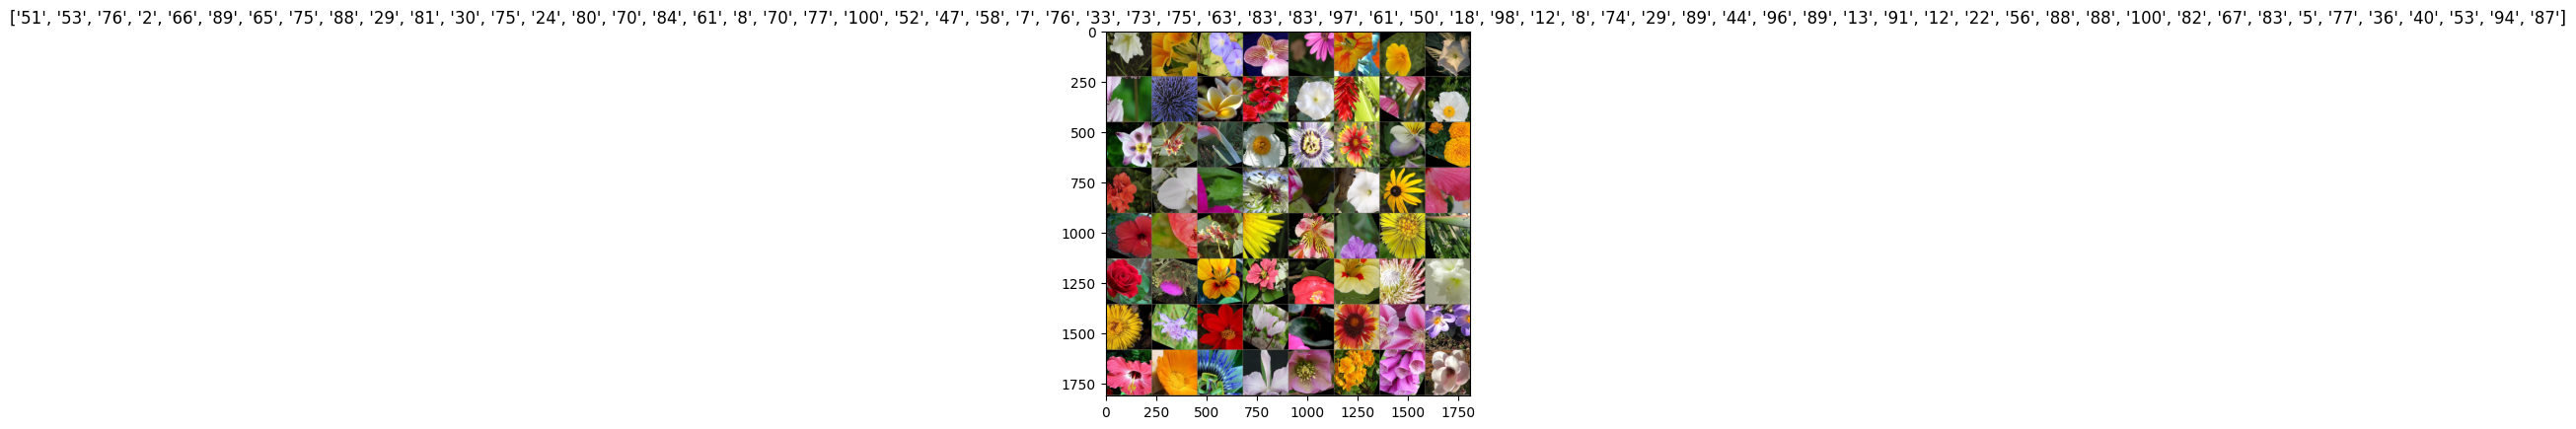

In [29]:
class_names = train_data.classes
def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(trainloader))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [30]:


def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for images, labels in validloader:

            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            for j in range(images.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(images.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

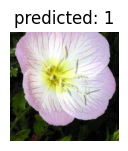

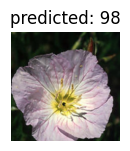

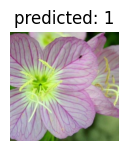

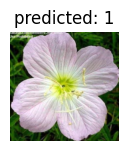

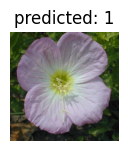

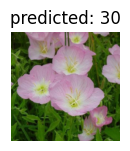

In [31]:
visualize_model(model)

In [32]:
weights = models.ResNet50_Weights

# TODO: Write a function that loads a checkpoint and rebuilds the model
def load_Checkpoint(filename):
    
    if torch.cuda.is_available():
        checkpoint = torch.load(filename)
    else:
        checkpoint = torch.load(filename,map_location='cpu')
        
    # get pre-trained model
    model1 = models.resnet50(weights = weights)
    
    # freeze parameters - to prevent gradients and backprop
    for param in model1.parameters():
        param.requires_grad = False

    # TODO - this function should load for any architecture
    
    classifier = nn.Sequential(nn.Linear(2048, 500),
                               nn.ReLU(),
                               nn.Dropout(p=0.2),
                               nn.Linear(500, num_classes),
                               nn.LogSoftmax(dim=1)
                              )
    model1.fc = classifier   
    
    
    model1.load_state_dict(checkpoint['model_state_dict'])
    
    model1.class_to_idx = checkpoint['class_to_idx']
    
    return model1

In [33]:


# test saving and loading
criterion = nn.NLLLoss()
new_model = load_Checkpoint('trained_model_chpt.pth')



In [34]:
# TODO: Do validation on the test set
def test_network(model1, testloader, device):
    start = time.time()
    test_loss = 0
    accuracy = 0

    # turn of dropouts
    model1.eval()

    with torch.no_grad():                

        for images, labels in testloader:

            # move the variables to GPU
            images, labels = images.to(device), labels.to(device) 

            logps = model1(images)
            loss = criterion(logps, labels)
            test_loss += loss.item()

            # Calculate accuracy
            ps = torch.exp(logps)
            top_prob, top_class = ps.topk(1, dim=1)
            targets = labels.view(*top_class.shape)
            isEqual = top_class == targets                                                  
            accuracy += torch.mean(isEqual.type(torch.FloatTensor))

        print(f"Test loss: {test_loss/len(testloader):.3f}.. "
              f"Test accuracy: {accuracy/len(testloader):.3f}")
        print(f" Time per batch: {(time.time() - start):.3f} seconds")
        test_loss = 0

        # switch back to training
        model1.train()

In [35]:


# adiitional test - check if loaded checkpoint performs as expected
# setup to pick up GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
new_model.to(device)
test_network(new_model, testloader, device)



Test loss: 0.429.. Test accuracy: 0.882
 Time per batch: 26.562 seconds
